In [4]:
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

from models.transformer import create_vit_model, fit_vit_model
from models.utils.get_test_data import get_all_bands
from models.utils.root_mean_squared_error import root_mean_squared_error
import os.path as osp
import csv
import data
import matplotlib.pyplot as plt
from analysis.exploratory_data_analysis.utils.visual_utils import plot_patch_data
from collections import Counter

In [5]:
train_data_path = osp.join(osp.dirname(data.__file__), "forest-biomass")
with open(osp.join(osp.dirname(data.__file__), 'patch_names'), newline='') as f:
    reader = csv.reader(f)
    patch_name_data = list(reader)
patch_names = patch_name_data[0]

X_all, y_all, selected_patch_names = get_all_bands(patch_names, train_data_path)

In [25]:
center_coordinates = [(int(256 / 9) * x) - 13 for x in range(1, 10, 3)]
center_coordinates

[15, 99, 183]

In [51]:
left = [center_coordinates[0] + x for x in range(1, 26)]
middle = [center_coordinates[1] + x for x in range(1, 26)]
right = [center_coordinates[2] + x for x in range(1, 26)]
all_horizontal = left + middle + right
combinations = [(x, y) for y in center_coordinates for x in all_horizontal]
len(combinations)

225

In [54]:
combinations_chunks = [combinations[x:x+25] for x in range(0, len(combinations), 25)]
print(len(combinations_chunks))
print(len(combinations_chunks[0]))

9
25


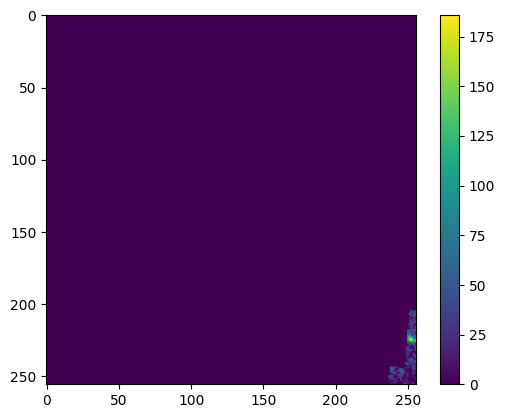

CORRUPTED


SystemExit: 

In [66]:
from models.utils.check_corrupted import is_corrupted
from analysis.exploratory_data_analysis.utils.visual_utils import plot_patch_data
from collections import Counter
import sys

early_stopping = 0

missing_count = 0
all_count = 0
for month in X_all:
    for band in month:
        all_count += 1

        if is_corrupted(band):
            plot_patch_data(band)
            missing_count += 1
            early_stopping += 1
            print("CORRUPTED")
            if early_stopping >= 1:
                sys.exit()

        # corrupted_count = 0
        # for chunk in combinations_chunks:
        #     coordinate_values = []
        #
        #     for coordinate in chunk:
        #         coordinate_values.append(band[coordinate])
        #
        #     c = Counter(coordinate_values)
        #     pixel_counts = c.most_common()
        #     threshold = 25
        #     print(pixel_counts[0:3])
        #
        #     if pixel_counts[0][1] >= threshold:
        #         corrupted_count += 1
        #
        # if corrupted_count >= 3:
        #     plot_patch_data(band)
        #     missing_count += 1
        #     early_stopping += 1
        #     print("CORRUPTED")
        #     if early_stopping >= 1:
        #         sys.exit()

print(missing_count)
print(all_count)